<a href="https://colab.research.google.com/github/harshitha-36/Computer_Vision/blob/main/MV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

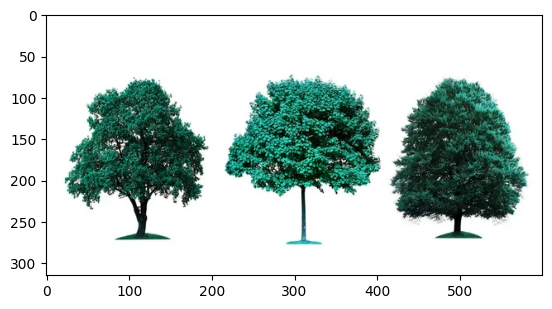

In [ ]:
image = cv2.imread('/content/tree.jpg')
plt.imshow(image)

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Create a mask
mask = np.zeros_like(gray_image)

In [ ]:
# Initialize a seed point for foreground
seed_point = (150, 300)

In [ ]:
# Set up the region growing parameters
rect = (0, 0, image.shape[1] - 1, image.shape[0] - 1)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

In [ ]:
# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Get the binary mask
binary_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

In [ ]:
# Apply the mask to extract the object
extracted_object = cv2.bitwise_and(image, image, mask=binary_mask)

extracted_object_rgb = cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Extracted Object')

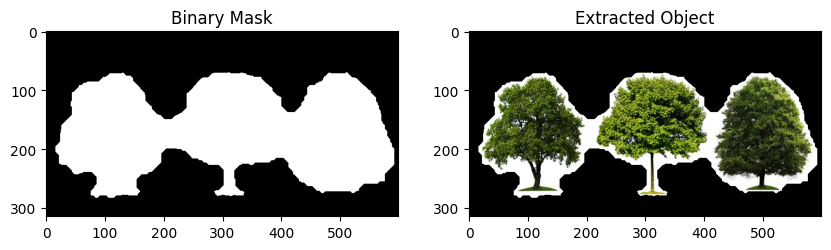

In [ ]:
# Display the binary mask
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.subplot(1,2,2)
plt.imshow(extracted_object_rgb)
plt.title('Extracted Object')

